<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>


# Liga Data Science
## Prof. Eduardo Pécora

# Regressão Linear Múltipla e XGBOOST
## Coleta e Entendimento dos dados
Tempo estimado: **15** minutos

## Objetivos

Após completar esta aula, você será capaz de:

* Comparar os resulatdos de dois modelos diferentes.

## Bibliotecas

In [1]:
# Instalando o Pandas Profiling
!pip install ydata-profiling

# importando a biblioteca pandas para manipulação de dados
import pandas as pd
from ydata_profiling import ProfileReport

# Iportando numpy para criar, manipular e operar em arrays multidimensionais, bem como para realizar operações matemáticas avançadas.
import numpy as np

# Importando a biblioteca math que fornece funções matemáticas básicas
import math

# importando as bibliotecas do matplotlib para gerar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt

# Importando biblioteca do seaborn para gerar gráficos mais atraentes e informativos
import seaborn as sns

# Importando a classe LinearRegression do sklearn
# Essa classe implementa uma versão da regressão linear simples ou múltipla
# Usado para modelar a relação entre uma variável dependente contínua e uma ou mais variáveis independentes.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor

# Usado para exibir os gráficos gerados pela biblioteca Matplotlib diretamente no notebook, sem precisar abrir uma janela externa.
%matplotlib inline

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=162537a674d10c125c1039c9a8b43d4014b1be08e1a95658ad8568d763aaf117
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


## Coleta & Preparação dos dados

In [2]:
# Caminho do arquivo csv
caminho = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/MeuAutoLimpoPP.csv"

#Obtendo arquivo e passando-o para um dataframe
df = pd.read_csv(caminho)

# Excluir as colunas não numéricas

df = df.drop(columns=['make','body-style'])

#Variáveis Independentes
X = df.drop(columns=['price'])
y = df['price']  # Target variable

# Separar em dados de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelagem e Avaliação

### Regressão Linear

In [3]:
# Inicializar o Modelo
linear_model = LinearRegression()

# Treinar o Modelo Linear
linear_model.fit(X_train, y_train)

# Fazer as Predições
y_hat_linear = linear_model.predict(X_test)

# Avaliar o modelo de regressão
mse_linear = mean_squared_error(y_test, y_hat_linear)
rmse_linear = np.sqrt(mse_linear)
R2 = linear_model.score(X_test, y_test)

print(f"Regressão Linear \nRoot Mean Squared Error (RMSE): {rmse_linear}")
print(f"R2: {R2}")

Regressão Linear 
Root Mean Squared Error (RMSE): 5547.193466463309
R2: 0.748490666496155


### XGBoost

In [4]:
# Inicializar o modelo XGBoost
XGmodel = XGBRegressor(objective='reg:squarederror', random_state=42)  # Use appropriate objective function for regression
XGmodel.fit(X_train, y_train)

# Fazer as Predições
y_hat_xgBoost = XGmodel.predict(X_test)

# Avaliar o modelo de XGBOOST
mse_xg = mean_squared_error(y_test, y_hat_xgBoost)
rmse_xg = np.sqrt(mse_xg)
R2 = XGmodel.score(X_test, y_test)

print(f"Regressão Linear \nRoot Mean Squared Error (RMSE): {rmse_xg}")
print(f"R2: {R2}")

Regressão Linear 
Root Mean Squared Error (RMSE): 3413.113241602159
R2: 0.9047842025756836


## Aprofundando a Avaliação

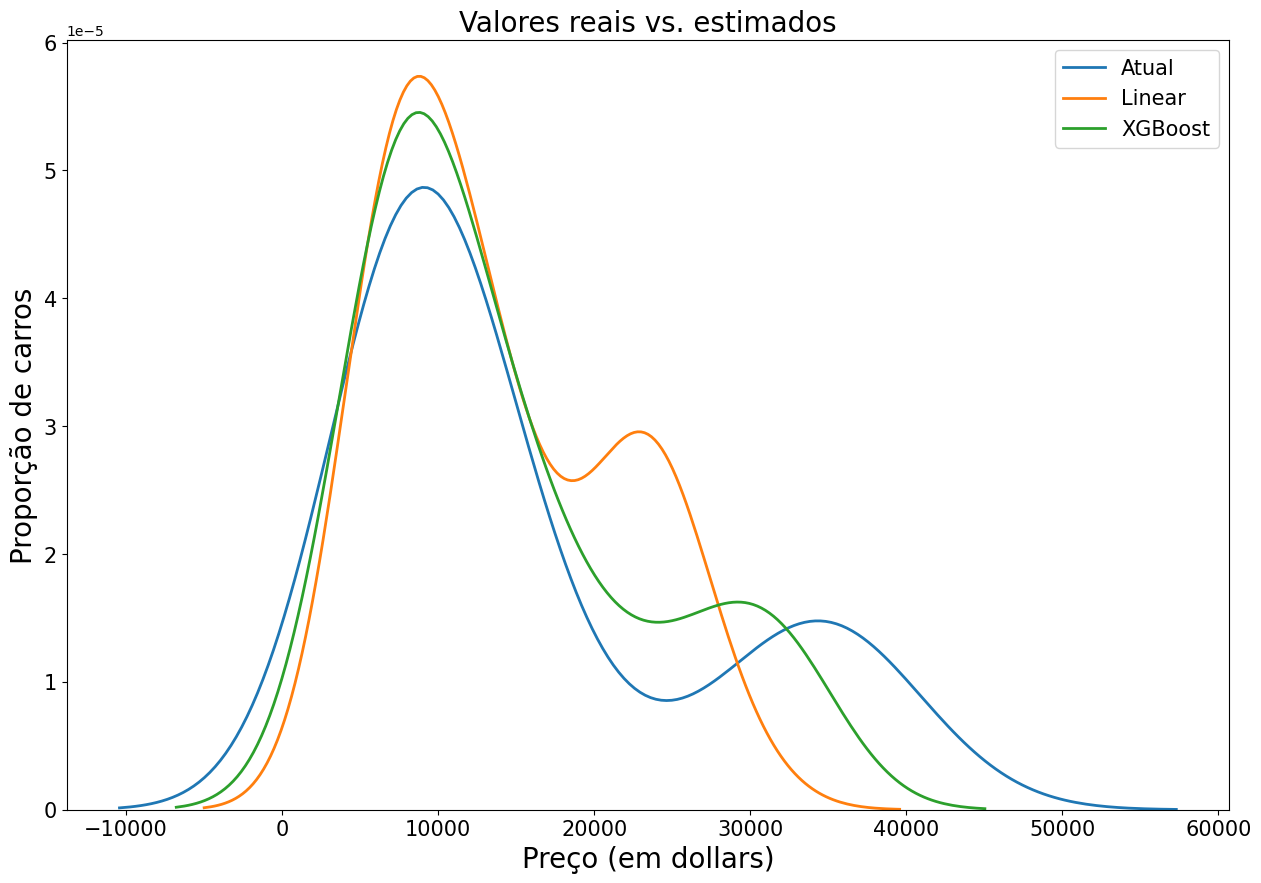

In [5]:
df_resultado = pd.DataFrame({'Atual': y_test, 'Linear': y_hat_linear,'XGBoost': y_hat_xgBoost})

plt.figure(figsize=(15, 10))

sns.kdeplot(data = df_resultado['Atual'], label = 'Atual', linewidth = 2)
sns.kdeplot(data = df_resultado['Linear'], label = 'Linear', linewidth = 2)
sns.kdeplot(data = df_resultado['XGBoost'], label = 'XGBoost', linewidth = 2)

plt.title('Valores reais vs. estimados', size = 20)
plt.xlabel('Preço (em dollars)', size = 20)
plt.ylabel('Proporção de carros', size = 20)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.legend(labels=['Atual',"Linear",'XGBoost'], fontsize = 15, bbox_to_anchor=(1, 1))

## Fique Conectado

- [![YouTube](https://img.icons8.com/?size=40&id=19318&format=png&color=000000)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/?size=40&id=13930&format=png&color=000000)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/?size=40&id=32323&format=png&color=000000)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>, <a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a> , <a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Referências:

Traduzido e inspirado do material desenvolviedo pela IBM:
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

* Documentação da biblioteca <a href="https://pandas.pydata.org/docs/">Pandas</a>
* Documentação da biblioteca <a href="https://seaborn.pydata.org/">Seaborn</a>
* Documentação do biblioteca <a href="https://matplotlib.org/">Matplotlib</a>
* Documentação do biblioteca <a href="https://numpy.org/devdocs/reference/index.html">Numpy</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 04-04-2021       | 1.0     | Eduardo Pecora    | Inicial               |
| 03-11-2021       | 1.1     | Eduardo Pecora    | Estrutura Aula        |
| 08-03-2022       | 1.2     | Eduardo Pecora    | GitHub                |
| 17-04-2023       | 1.3     | Hesau Hugo        | Reestruturação        |
| 18-09-2024       | 1.4     | João Gabriel      | Atualização           |
| 12-02-2025       | 1.4.1   | Eduardo Pecora      | Metodologia           |